Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


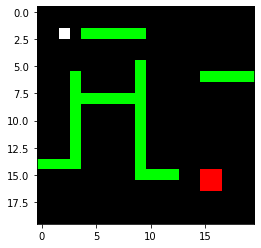

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [255. 255. 255.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]


In [16]:
import gym
import matplotlib.pyplot as plt
import numpy as np

map_matrix = np.load("lab12_map_matrix.npy")
plt.imshow(map_matrix)
plt.show()
print(map_matrix)

# white:[255,255,255]
# green:[0,30,0]
# red:[255,0,0]

In [17]:
class Envaronment(object):
    def __init__(self, map_matrix):
        self.nS = len(map_matrix) * len(map_matrix[0])
        self.nA = 4
        self.map_matrix = map_matrix

    def get_P(self):
        # 20*20
        x, y = len(map_matrix), len(map_matrix[0])
        self.position = [[-1 for _ in range(y)] for _ in range(x)]
        for i in range(x):
            for j in range(y):
                if np.all(self.map_matrix == [255.0, 255.0, 255.0]):
                    self.position[i][j] = 0
                elif np.all(self.map_matrix == [0.0, 30.0, 0.0]):
                    self.position[i][j] = -10
                elif np.all(self.map_matrix == [255.0, 0.0, 0.0]):
                    self.position[i][j] = 10

        # 构建P
        self.P = {i: {} for i in range(self.nS)}
        # up, down, left, right - action 0, 1, 2, 3
        up, down, left, right = 0, 1, 2, 3
        p = 0.25
        for m in range(x):
            for n in range(y):
                for j in range(self.nA):
                    i = m * x + n
                    if m - 1 >= 0:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m - 1][n] == 10:
                            flag = True
                        self.P[i][j].append((p, (m - 1) * 20 + n, self.position[m - 1][n], flag))
                    if m + 1 <= 19:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m + 1][n] == 10:
                            flag = True
                        self.P[i][j].append((p, (m + 1) * 20 + n, self.position[m + 1][n], flag))
                    if n - 1 >= 0:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m][n - 1] == 10:
                            flag = True
                        self.P[i][j].append((p, i - 1, self.position[m][n - 1], flag))
                    if n + 1 <= 19:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m][n + 1] == 10:
                            flag = True
                        self.P[i][j].append((p, i + 1, self.position[m][n + 1], flag))
                        
                        

In [18]:
env = Envaronment(map_matrix)
env.get_P()
theta = 0.0001
V = np.zeros(env.nS)
print(env.P)
while True:
    # Stopping condition
    delta = 0
    # Update 
    discount_factor = 1
    for s in range(env.nS):
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[s][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
                
        best_action_value = np.max(A)
        delta = max(delta, np.abs(best_action_value - V[s]))
        V[s] = best_action_value
    if delta < theta:
        break

print(V)

{0: {0: [(0.25, 20, -1, False), (0.25, 1, -1, False)], 1: [(0.25, 20, -1, False), (0.25, 1, -1, False)], 2: [(0.25, 20, -1, False), (0.25, 1, -1, False)], 3: [(0.25, 20, -1, False), (0.25, 1, -1, False)]}, 1: {0: [(0.25, 21, -1, False), (0.25, 0, -1, False), (0.25, 2, -1, False)], 1: [(0.25, 21, -1, False), (0.25, 0, -1, False), (0.25, 2, -1, False)], 2: [(0.25, 21, -1, False), (0.25, 0, -1, False), (0.25, 2, -1, False)], 3: [(0.25, 21, -1, False), (0.25, 0, -1, False), (0.25, 2, -1, False)]}, 2: {0: [(0.25, 22, -1, False), (0.25, 1, -1, False), (0.25, 3, -1, False)], 1: [(0.25, 22, -1, False), (0.25, 1, -1, False), (0.25, 3, -1, False)], 2: [(0.25, 22, -1, False), (0.25, 1, -1, False), (0.25, 3, -1, False)], 3: [(0.25, 22, -1, False), (0.25, 1, -1, False), (0.25, 3, -1, False)]}, 3: {0: [(0.25, 23, -1, False), (0.25, 2, -1, False), (0.25, 4, -1, False)], 1: [(0.25, 23, -1, False), (0.25, 2, -1, False), (0.25, 4, -1, False)], 2: [(0.25, 23, -1, False), (0.25, 2, -1, False), (0.25, 4, -